In [1]:
library(repr)
library(tidyverse)
# setting the size of all graphics
options(repr.plot.width=6, repr.plot.height=4)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Code a simple one-variable regression

For the first coding exercise, you'll create a formula to define a one-variable modeling task, and then fit a linear model to the data. You are given the rates of male and female unemployment in the United States over several years.

The task is to predict the rate of female unemployment from the observed rate of male unemployment. The outcome is female_unemployment, and the input is male_unemployment.

The sign of the variable coefficient tells you whether the outcome increases (+) or decreases (-) as the variable increases.

In [8]:
unemployment <- readRDS("unemployment.rds")

In [9]:
summary(unemployment)

 male_unemployment female_unemployment
 Min.   :2.900     Min.   :4.000      
 1st Qu.:4.900     1st Qu.:4.400      
 Median :6.000     Median :5.200      
 Mean   :5.954     Mean   :5.569      
 3rd Qu.:6.700     3rd Qu.:6.100      
 Max.   :9.800     Max.   :7.900      

In [10]:
# Define a formula to express female_unemployment as a function of male_unemployment
fmla <- female_unemployment ~ male_unemployment

# Use the formula to fit a model: unemployment_model
unemployment_model <- lm(fmla, data = unemployment)

# Print it
unemployment_model


Call:
lm(formula = fmla, data = unemployment)

Coefficients:
      (Intercept)  male_unemployment  
           1.4341             0.6945  


The coefficient for male unemployment is positive, so female unemployment increases as male unemployment does. Linear regression is the most basic of regression approaches. You can think of this course as ways to address its limitations.

### Examining a model

Let's look at the model unemployment_model that you have just created. There are a variety of different ways to examine a model; each way provides different information. We will use `summary()`, `broom::glance()`, and `sigr::wrapFTest()`.

In [12]:
library(broom)
library(sigr)
# Call summary() on unemployment_model to get more details
summary(unemployment_model)

# Call glance() on unemployment_model to see the details in a tidier form
glance(unemployment_model)

# Call wrapFTest() on unemployment_model to see the most relevant details
wrapFTest(unemployment_model)



Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
value,0.8213157,0.8050716,0.5802596,50.56108,1.965985e-05,2,-10.28471,26.56943,28.26428,3.703714,11


[1] "F Test summary: (R2=0.8213, F(1,11)=50.56, p=1.966e-05)."

### Predicting from the unemployment model

In this exercise, you will use your unemployment model unemployment_model to make predictions from the unemployment data, and compare predicted female unemployment rates to the actual observed female unemployment rates on the training data, unemployment. You will also use your model to predict on the new data in newrates, which consists of only one observation, where male unemployment is 5%.

The `predict()` interface for lm models takes the form

    predict(model, newdata)

You will use the ggplot2 package to make the plots, so you will add the prediction column to the unemployment data frame. You will plot outcome versus prediction, and compare them to the line that represents perfect predictions (that is when the outcome is equal to the predicted value).

In [13]:
newrates <- data.frame(male_unemployment = 5)

male_unemployment,female_unemployment,prediction
2.9,4.0,3.448245
6.7,7.4,6.087456


1 
4.906757

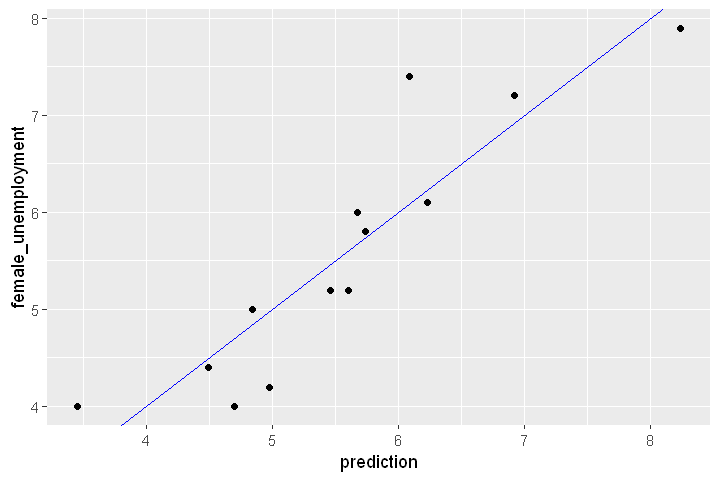

In [15]:
# Predict female unemployment in the unemployment data set
unemployment$prediction <- predict(unemployment_model)

head(unemployment, 2)
# Make a plot to compare predictions to actual (prediction on x axis). 
ggplot(unemployment, aes(x = prediction, y = female_unemployment)) + 
  geom_point() +
  geom_abline(color = "blue")

# Predict female unemployment rate when male unemployment is 5%
pred <- predict(unemployment_model, newdata = newrates)
# Print it
pred

### Multivariate linear regression (Part 1)

In this exercise, you will work with the blood pressure dataset, and model blood_pressure as a function of weight and age.

In [16]:
bloodpressure <- readRDS("bloodpressure.rds")

In [17]:
# bloodpressure is in the workspace
summary(bloodpressure)

# Create the formula and print it
fmla <- blood_pressure ~ weight + age

# Fit the model: bloodpressure_model
bloodpressure_model <- lm(fmla, data = bloodpressure)

# Print bloodpressure_model and call summary() 
summary(bloodpressure_model)
bloodpressure_model

 blood_pressure       age            weight   
 Min.   :128.0   Min.   :46.00   Min.   :167  
 1st Qu.:140.0   1st Qu.:56.50   1st Qu.:186  
 Median :153.0   Median :64.00   Median :194  
 Mean   :150.1   Mean   :62.45   Mean   :195  
 3rd Qu.:160.5   3rd Qu.:69.50   3rd Qu.:209  
 Max.   :168.0   Max.   :74.00   Max.   :220  


Call:
lm(formula = fmla, data = bloodpressure)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4640 -1.1949 -0.4078  1.8511  2.6981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  30.9941    11.9438   2.595  0.03186 * 
weight        0.3349     0.1307   2.563  0.03351 * 
age           0.8614     0.2482   3.470  0.00844 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.318 on 8 degrees of freedom
Multiple R-squared:  0.9768,	Adjusted R-squared:  0.9711 
F-statistic: 168.8 on 2 and 8 DF,  p-value: 2.874e-07



Call:
lm(formula = fmla, data = bloodpressure)

Coefficients:
(Intercept)       weight          age  
    30.9941       0.3349       0.8614  


One of the advantages of linear regression is that you can interpret the effects of each variable on the input – to a certain extent. In this case the coefficients for both age and weight are positive, which indicates that bloodpressure tends to increase as both age and weight increase. 

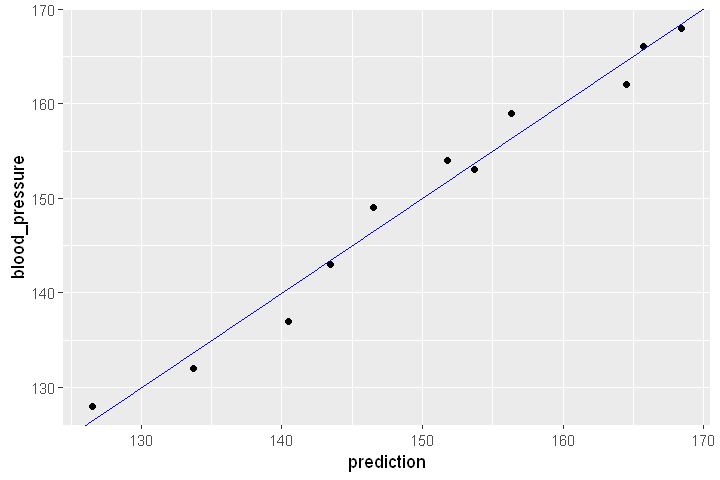

In [20]:
# predict blood pressure using bloodpressure_model :prediction
bloodpressure$prediction <- predict(bloodpressure_model)

# plot the results
ggplot(bloodpressure, aes(x = prediction, y = blood_pressure)) + 
    geom_point() +
    geom_abline(color = "blue")

The results stay fairly close to the line of perfect prediction, indicating that the model fits the training data well. From a prediction perspective, multivariate linear regression behaves much as simple (one-variable) linear regression does. 

### Graphically evaluate the unemployment model

In this exercise you will graphically evaluate the `unemployment model`, that you fit to the unemployment data in the previous chapter. Recall that the model predicts `female_unemployment` from `male_unemployment`.

Then you will calculate the residuals:

    residuals <- actual outcome - predicted outcome

and plot predictions against residuals. The residual graph will take a slightly different form: you compare the residuals to the horizonal line x=0 (using geom_hline()) rather than to the line x=y. 

 male_unemployment female_unemployment   prediction   
 Min.   :2.900     Min.   :4.000       Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


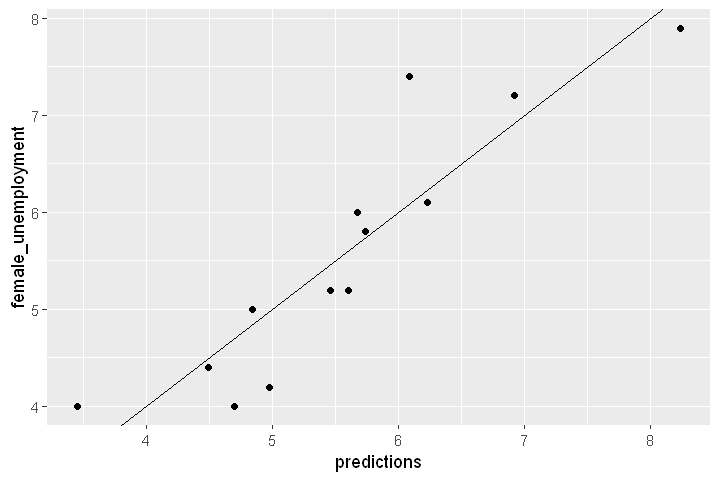

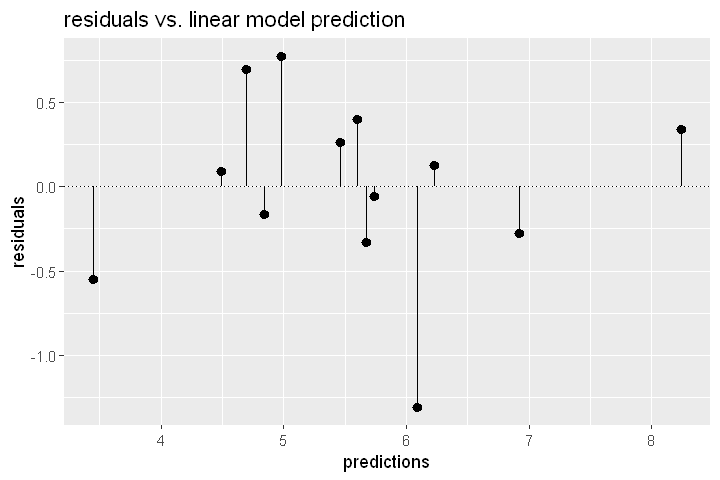

In [21]:
# unemployment is in the workspace
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

# Make predictions from the model
unemployment$predictions <- predict(unemployment_model)

# Fill in the blanks to plot predictions (on x-axis) versus the female_unemployment rates
ggplot(unemployment, aes(x = predictions, y = female_unemployment)) + 
  geom_point() + 
  geom_abline()

# Calculate residuals
unemployment$residuals <- unemployment$predictions - unemployment$female_unemployment

# Fill in the blanks to plot predictions (on x-axis) versus the residuals
ggplot(unemployment, aes(x = predictions, y = residuals)) + 
  geom_pointrange(aes(ymin = 0, ymax = residuals)) + 
  geom_hline(yintercept = 0, linetype = 3) + 
  ggtitle("residuals vs. linear model prediction")

### The gain curve to evaluate the unemployment model

In the previous exercise you made predictions about female_unemployment and visualized the predictions and the residuals. Now, you will also plot the gain curve of the unemployment_model's predictions against actual female_unemployment using the `WVPlots::GainCurvePlot()` function.

For situations where order is more important than exact values, the gain curve helps you check if the model's predictions sort in the same order as the true outcome.

Calls to the function `GainCurvePlot()` look like:

    GainCurvePlot(frame, xvar, truthvar, title)

where `frame` is a data frame, `xvar` and `truthvar` are strings naming the prediction and actual outcome columns of frame and `title` is the title of the plot.

When the predictions sort in exactly the same order, the relative Gini coefficient is 1. When the model sorts poorly, the relative Gini coefficient is close to zero, or even negative.

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-1.31254  
 1st Qu.:-0.27911  
 Median : 0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.34050  
 Max.   : 0.77621  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


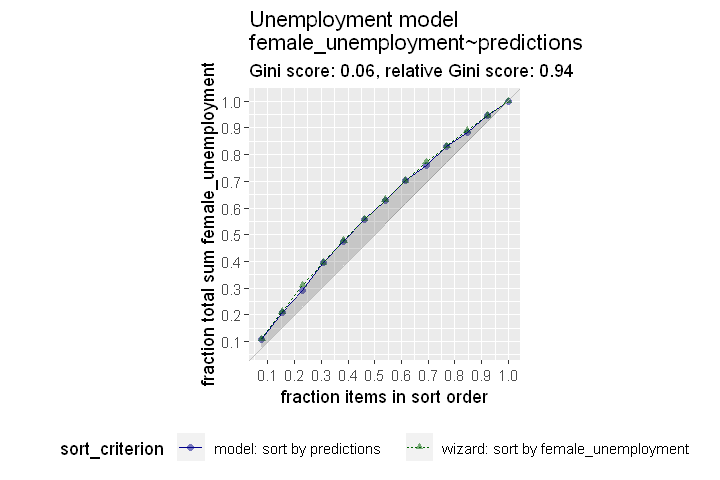

In [23]:
# unemployment is in the workspace (with predictions)
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

# Load the package WVPlots
library(WVPlots)

# Plot the Gain Curve
GainCurvePlot(unemployment, "predictions", "female_unemployment", "Unemployment model")

A relative gini coefficient close to one shows that the model correctly sorts high unemployment situations from lower ones

### Calculate RMSE

In this exercise you will calculate the RMSE of your unemployment model. In the previous coding exercises, you added two columns to the unemployment dataset:

* the model's predictions (predictions column)
* the residuals between the predictions and the outcome (residuals column)

You can calculate the RMSE from a vector of residuals, $res$, as:

$$ RMSE=\sqrt{mean(res^2)}$$

You want $RMSE$ to be small. How small is "small"? One heuristic is to compare the RMSE to the standard deviation of the outcome. With a good model, the RMSE should be smaller.

In [24]:
# unemployment is in the workspace
summary(unemployment)

# For convenience put the residuals in the variable res
res <- unemployment$residuals

# Calculate RMSE, assign it to the variable rmse and print it
(rmse <- sqrt(mean(res^2)))

# Calculate the standard deviation of female_unemployment and print it
(sd_unemployment <- sd(unemployment$female_unemployment))

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-1.31254  
 1st Qu.:-0.27911  
 Median : 0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.34050  
 Max.   : 0.77621  

[1] 0.5337612

[1] 1.314271

 An RMSE much smaller than the outcome's standard deviation suggests a model that predicts well. 

### Calculate R-Squared

Now that you've calculated the RMSE of your model's predictions, you will examine how well the model fits the data: that is, how much variance does it explain. You can do this using $R^2$.

Suppose $y$ is the true outcome, $p$ is the prediction from the model, and $res=y−p$ are the residuals of the predictions.

Then the total sum of squares $tss$ ("total variance") of the data is:

$$ tss=\sum{(y−\hat{y})^2} $$

where $\hat{y}$ is the mean value of $y$.

The residual sum of squared errors of the model, $rss$ is:

$$ rss=\sum{res^2} $$

$R^2$ (R-Squared), the "variance explained" by the model, is then:

$$ 1−\frac{rss}{tss} $$

After you calculate $R^2$, you will compare what you computed with the $R^2$ reported by `glance()`. `glance()` returns a one-row data frame; for a linear regression model, one of the columns returned is the $R^2$ of the model on the training data.

The data frame unemployment is in your workspace, with the columns predictions and residuals that you calculated in a previous exercise.

In [25]:
# unemployment is in your workspace
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

# Calculate mean female_unemployment: fe_mean. Print it
(fe_mean <- mean(unemployment$female_unemployment))

# Calculate total sum of squares: tss. Print it
(tss <- sum((unemployment$female_unemployment - fe_mean)^2))

# Calculate residual sum of squares: rss. Print it
(rss <- sum(unemployment$residuals^2))

# Calculate R-squared: rsq. Print it. Is it a good fit?
(rsq <- 1 -(rss / tss))

# Get R-squared from glance. Print it
(rsq_glance <- glance(unemployment_model)$r.squared)

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-1.31254  
 1st Qu.:-0.27911  
 Median : 0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.34050  
 Max.   : 0.77621  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


[1] 5.569231

[1] 20.72769

[1] 3.703714

[1] 0.8213157

[1] 0.8213157

An R-squared close to one suggests a model that predicts well. 

### Correlation and R-squared

The linear correlation of two variables, $x$ and $y$, measures the strength of the linear relationship between them. When $x$ and $y$ are respectively:

* the outcomes of a regression model that minimizes squared-error (like linear regression) and
* the true outcomes of the training data,

then the square of the correlation is the same as $R^2$. You will verify that in this exercise.

In [26]:
# Get the correlation between the prediction and true outcome: rho and print it
(rho <- cor(unemployment$predictions, unemployment$female_unemployment))

# Square rho: rho2 and print it
(rho2 <- rho^2)

# Get R-squared from glance and print it
(rsq_glance <- glance(unemployment_model)$r.squared)

[1] 0.9062647

[1] 0.8213157

[1] 0.8213157

Remember this equivalence is only true for the training data, and only for models that minimize squared error. 

### Generating a random test/train split

For the next several exercises you will use the mpg data from the package ggplot2. The data describes the characteristics of several makes and models of cars from different years. The goal is to predict city fuel efficiency from highway fuel efficiency.

In this exercise, you will split `mpg` into a training set `mpg_train` (75% of the data) and a test set `mpg_test` (25% of the data). One way to do this is to generate a column of uniform random numbers between 0 and 1, using the function `runif()`.

If you have a data set dframe of size $N$, and you want a random subset of approximately size $100∗X$% of $N$ (where $X$ is between 0 and 1), then:

1. Generate a vector of uniform random numbers: `gp = runif(N)`.
2. `dframe[gp < X,]` will be about the right size.
3. `dframe[gp >= X,]` will be the complement.


In [27]:
# mpg is in the workspace
summary(mpg)
dim(mpg)

# Use nrow to get the number of rows in mpg (N) and print it
(N <- nrow(mpg))

# Calculate how many rows 75% of N should be and print it
# Hint: use round() to get an integer
(target <-round(0.75 * N))

# Create the vector of N uniform random variables: gp
gp <- runif(N)

# Use gp to create the training set: mpg_train (75% of data) and mpg_test (25% of data)
mpg_train <- mpg[gp < 0.75,]
mpg_test <- mpg[gp >= 0.75,]

# Use nrow() to examine mpg_train and mpg_test
nrow(mpg_train)
nrow(mpg_test)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

[1] 234  11

[1] 234

[1] 176

[1] 190

[1] 44

### Train a model using test/train split

Now that you have split the mpg dataset into `mpg_train` and `mpg_test`, you will use `mpg_train` to train a model to predict city fuel efficiency (`cty`) from highway fuel efficiency (`hwy`).

In [28]:
# mpg_train is in the workspace
summary(mpg_train)

# Create a formula to express cty as a function of hwy: fmla and print it.
(fmla <- cty ~ hwy)

# Now use lm() to build a model mpg_model from mpg_train that predicts cty from hwy 
mpg_model <- lm(fmla, data = mpg_train)

# Use summary() to examine the model
summary(mpg_model)

 manufacturer          model               displ            year     
 Length:190         Length:190         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.500   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2008  
                                       Mean   :3.539   Mean   :2004  
                                       3rd Qu.:4.675   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:190         Length:190         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :16.00  
 Mean   :5.984                                         Mean   :16.71  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

cty ~ hwy


Call:
lm(formula = fmla, data = mpg_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8727 -0.7517 -0.1405  0.5278  4.7415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04209    0.36960   2.819  0.00533 ** 
hwy          0.67323    0.01538  43.779  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.272 on 188 degrees of freedom
Multiple R-squared:  0.9107,	Adjusted R-squared:  0.9102 
F-statistic:  1917 on 1 and 188 DF,  p-value: < 2.2e-16


### Evaluate a model using test/train split

Now you will test the model `mpg_model` on the test data, `mpg_test`. Functions `rmse()` and `r_squared()` to calculate RMSE and R-squared have been provided for convenience:

    rmse(predcol, ycol)
    r_squared(predcol, ycol)

where:

* predcol: The predicted values
* ycol: The actual outcome

You will also plot the predictions vs. the outcome.

Generally, model performance is better on the training data than the test data (though sometimes the test set "gets lucky"). A slight difference in performance is okay; if the performance on training is significantly better, there is a problem.

In [29]:
# RMSE function to calculate the RMSE
rmse <- function(predcol, ycol) {
  res = predcol-ycol
  sqrt(mean(res^2))
}

# function to calculate r^2
r_squared <- function(predcol, ycol) {
  tss = sum((ycol - mean(ycol))^2 )
  rss = sum((predcol - ycol)^2 )
  1 - rss/tss
}

In [30]:
# Examine the objects in the workspace
ls.str()

bloodpressure : 'data.frame':	11 obs. of  4 variables:
 $ blood_pressure: int  132 143 153 162 154 168 137 149 159 128 ...
 $ age           : int  52 59 67 73 64 74 54 61 65 46 ...
 $ weight        : int  173 184 194 211 196 220 188 188 207 167 ...
 $ prediction    : num  134 143 154 165 152 ...
bloodpressure_model : List of 12
 $ coefficients : Named num [1:3] 30.994 0.335 0.861
 $ residuals    : Named num [1:11] -1.718 -0.432 -0.672 -2.533 2.243 ...
 $ effects      : Named num [1:11] -497.8 41.82 -8.04 -2.09 2.66 ...
 $ rank         : int 3
 $ fitted.values: Named num [1:11] 134 143 154 165 152 ...
 $ assign       : int [1:3] 0 1 2
 $ qr           :List of 5
 $ df.residual  : int 8
 $ xlevels      : Named list()
 $ call         : language lm(formula = fmla, data = bloodpressure)
 $ terms        :Classes 'terms', 'formula'  language blood_pressure ~ weight + age
 $ model        :'data.frame':	11 obs. of  3 variables:
fe_mean :  num 5.57
fmla : Class 'formula'  language cty ~ hwy
gp : 

[1] 1.265259

[1] 1.176144

[1] 0.9106725

[1] 0.9232461

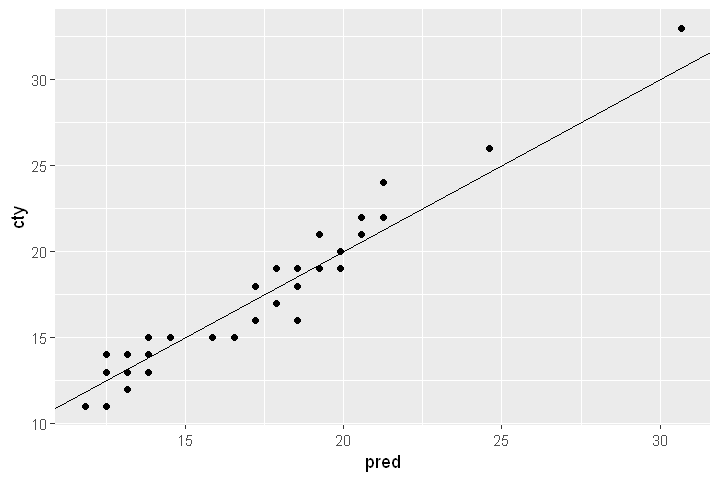

In [31]:
# predict cty from hwy for the training set
mpg_train$pred <- predict(mpg_model)

# predict cty from hwy for the test set
mpg_test$pred <- predict(mpg_model, newdata = mpg_test)

# Evaluate the rmse on both training and test data and print them
(rmse_train <- rmse(mpg_train$pred, mpg_train$cty))
(rmse_test <- rmse(mpg_test$pred, mpg_test$cty))


# Evaluate the r-squared on both training and test data.and print them
(rsq_train <- r_squared(mpg_train$pred, mpg_train$cty))
(rsq_test <- r_squared(mpg_test$pred, mpg_test$cty))

# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
ggplot(mpg_test, aes(x = pred, y = cty)) + 
  geom_point() + 
  geom_abline()

 Good performance on the test data is more confirmation that the model works as expected. 

### Create a cross validation plan

There are several ways to implement an n-fold cross validation plan. In this exercise you will create such a plan using `vtreat::kWayCrossValidation()`, and examine it.

`kWayCrossValidation()` creates a cross validation plan with the following call:

    splitPlan <- kWayCrossValidation(nRows, nSplits, dframe, y)

where `nRows` is the number of rows of data to be split, and `nSplits` is the desired number of cross-validation folds.

Strictly speaking, dframe and y aren't used by kWayCrossValidation; they are there for compatibility with other vtreat data partitioning functions. You can set them both to NULL.

The resulting splitPlan is a list of nSplits elements; each element contains two vectors:

* train: the indices of dframe that will form the training set
* app: the indices of dframe that will form the test (or application) set

In this exercise you will create a 3-fold cross-validation plan for the data set mpg.


In [33]:
library(vtreat)

In [36]:
# Get the number of rows in mpg
nRows <- nrow(mpg)
nRows
# Implement the 3-fold cross-fold plan with vtreat
splitPlan <- kWayCrossValidation(nRows, 3, NULL, NULL)

# Examine the split plan
str(splitPlan)

[1] 234

List of 3
 $ :List of 2
  ..$ train: int [1:156] 1 2 3 4 8 10 12 16 19 20 ...
  ..$ app  : int [1:78] 220 40 58 15 98 56 185 68 37 48 ...
 $ :List of 2
  ..$ train: int [1:156] 1 2 3 5 6 7 9 10 11 13 ...
  ..$ app  : int [1:78] 57 77 144 21 78 88 132 215 197 218 ...
 $ :List of 2
  ..$ train: int [1:156] 4 5 6 7 8 9 11 12 13 14 ...
  ..$ app  : int [1:78] 62 124 182 184 97 31 74 159 79 158 ...
 - attr(*, "splitmethod")= chr "kwaycross"


### Evaluate a modeling procedure using n-fold cross-validation

In this exercise you will use splitPlan, the 3-fold cross validation plan from the previous exercise, to make predictions from a model that predicts `mpg$cty` from `mpg$hwy`.

Cross-validation predicts how well a model built from all the data will perform on new data. As with the test/train split, for a good modeling procedure, cross-validation performance and training performance should be close.

In [37]:
# Run the 3-fold cross validation plan from splitPlan
k <- 3 # Number of folds
# Initialize a column of the appropriate length
mpg$pred.cv <- 0 

for(i in 1:k) {
  # get the ith split
  split <- splitPlan[[i]]
  # Build a model on the training data from the split
  model <- lm(cty ~ hwy, data = mpg[split$train,])
  # make predictions on the application data from this split
  mpg$pred.cv[split$app] <- predict(model, newdata = mpg[split$app,])
}

# Predict from a full model
mpg$pred <- predict(lm(cty ~ hwy, data = mpg))

# Get the rmse of the full model's predictions
rmse(mpg$pred, mpg$cty)

# Get the rmse of the cross-validation predictions
rmse(mpg$pred.cv, mpg$cty)

[1] 1.247045

[1] 1.255388

You have successfully estimated a model's out-of-sample error via cross-validation. Remember, cross-validation validates the modeling process, not an actual model. 

In [46]:
library(Sleuth3)

    Flowers           Time       Intensity  
 Min.   :31.30   Min.   :1.0   Min.   :150  
 1st Qu.:45.42   1st Qu.:1.0   1st Qu.:300  
 Median :54.75   Median :1.5   Median :525  
 Mean   :56.14   Mean   :1.5   Mean   :525  
 3rd Qu.:64.45   3rd Qu.:2.0   3rd Qu.:750  
 Max.   :78.00   Max.   :2.0   Max.   :900  

## Categorical inputs
### Examining the structure of categorical inputs

For this exercise you will call `model.matrix()` to examine how R represents data with both categorical and numerical inputs for modeling. The dataset flowers (derived from the Sleuth3 package). It has the following columns:

* Flowers: the average number of flowers on a meadowfoam plant
* Intensity: the intensity of a light treatment applied to the plant
* Time: A categorical variable - when (Late or Early) in the lifecycle the light treatment occurred

The ultimate goal is to predict Flowers as a function of Time and Intensity.

In [47]:
flowers <- case0901
flowers$Time[flowers$Time == 1] <- "Late"
flowers$Time[flowers$Time == 2] <- "Early"
# Call str on flowers to see the types of each column
str(flowers)

# Use unique() to see how many possible values Time takes
unique(flowers$Time)

'data.frame':	24 obs. of  3 variables:
 $ Flowers  : num  62.3 77.4 55.3 54.2 49.6 61.9 39.4 45.7 31.3 44.9 ...
 $ Time     : chr  "Late" "Late" "Late" "Late" ...
 $ Intensity: int  150 150 300 300 450 450 600 600 750 750 ...


[1] "Late"  "Early"

In [48]:
(fmla <- as.formula("Flowers ~ Intensity + Time"))

# Use fmla and model.matrix to see how the data is represented for modeling
mmat <- model.matrix(fmla, flowers)

# Examine the first 20 lines of flowers
head(flowers, 20)

# Examine the first 20 lines of mmat
head(mmat, 20)

Flowers ~ Intensity + Time

Flowers,Time,Intensity
62.3,Late,150
77.4,Late,150
55.3,Late,300
54.2,Late,300
49.6,Late,450
61.9,Late,450
39.4,Late,600
45.7,Late,600
31.3,Late,750
44.9,Late,750


,(Intercept),Intensity,TimeLate
1,1,150,1
2,1,150,1
3,1,300,1
4,1,300,1
5,1,450,1
6,1,450,1
7,1,600,1
8,1,600,1
9,1,750,1
10,1,750,1


### Modeling with categorical inputs

For this exercise you will fit a linear model to the flowers data, to predict Flowers as a function of Time and Intensity.

  (Intercept)   Intensity      TimeLate  
 Min.   :1    Min.   :150   Min.   :0.0  
 1st Qu.:1    1st Qu.:300   1st Qu.:0.0  
 Median :1    Median :525   Median :0.5  
 Mean   :1    Mean   :525   Mean   :0.5  
 3rd Qu.:1    3rd Qu.:750   3rd Qu.:1.0  
 Max.   :1    Max.   :900   Max.   :1.0  


Call:
lm(formula = fmla, data = flowers)

Residuals:
   Min     1Q Median     3Q    Max 
-9.652 -4.139 -1.558  5.632 12.165 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.464167   3.273772  25.495  < 2e-16 ***
Intensity    -0.040471   0.005132  -7.886 1.04e-07 ***
TimeLate    -12.158333   2.629557  -4.624 0.000146 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.441 on 21 degrees of freedom
Multiple R-squared:  0.7992,	Adjusted R-squared:   0.78 
F-statistic: 41.78 on 2 and 21 DF,  p-value: 4.786e-08


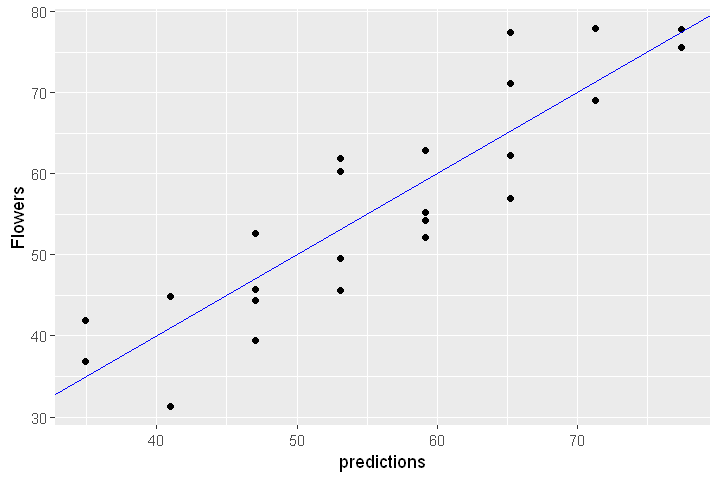

In [49]:
# Fit a model to predict Flowers from Intensity and Time : flower_model
flower_model <- lm(fmla, data = flowers)

# Use summary on mmat to remind yourself of its structure
summary(mmat)

# Use summary to examine flower_model 
summary(flower_model)

# Predict the number of flowers on each plant
flowers$predictions <- predict(flower_model)

# Plot predictions vs actual flowers (predictions on x-axis)
ggplot(flowers, aes(x = predictions, y = Flowers)) + 
  geom_point() +
  geom_abline(color = "blue") 

### Modeling an interaction

In this exercise you will use interactions to model the effect of gender and gastric activity on alcohol metabolism.

The data frame alcohol has columns:

* Metabol: the alcohol metabolism rate
* Gastric: the rate of gastric alcohol dehydrogenase activity
* Sex: the sex of the drinker (Male or Female)

In the video, we fit three models to the alcohol data:

* one with only additive (main effect) terms : Metabol ~ Gastric + Sex
* two models, each with interactions between gastric activity and sex

We saw that one of the models with interaction terms had a better R-squared than the additive model, suggesting that using interaction terms gives a better fit. In this exercise we will compare the R-squared of one of the interaction models to the main-effects-only model.

Recall that the operator : designates the interaction between two variables. The operator * designates the interaction between the two variables, plus the main effects.

    x*y = x + y + x:y


In [50]:
alcohol <- case1101

In [51]:
# alcohol is in the workspace
summary(alcohol)

# Create the formula with main effects only
(fmla_add <- Metabol ~ Gastric + Sex)

# Create the formula with interactions
(fmla_interaction <- Metabol ~ Gastric + Gastric:Sex)

# Fit the main effects only model
model_add <- lm(fmla_add, data = alcohol)

# Fit the interaction model
model_interaction <- lm(fmla_interaction, data = alcohol)

# Call summary on both models and compare
summary(model_add)
summary(model_interaction)

    Subject         Metabol          Gastric          Sex    
 Min.   : 1.00   Min.   : 0.100   Min.   :0.800   Female:18  
 1st Qu.: 8.75   1st Qu.: 0.600   1st Qu.:1.200   Male  :14  
 Median :16.50   Median : 1.700   Median :1.600              
 Mean   :16.50   Mean   : 2.422   Mean   :1.863              
 3rd Qu.:24.25   3rd Qu.: 2.925   3rd Qu.:2.200              
 Max.   :32.00   Max.   :12.300   Max.   :5.200              
          Alcohol  
 Alcoholic    : 8  
 Non-alcoholic:24  
                   
                   
                   
                   

Metabol ~ Gastric + Sex

Metabol ~ Gastric + Gastric:Sex


Call:
lm(formula = fmla_add, data = alcohol)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2779 -0.6328 -0.0966  0.5783  4.5703 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.9466     0.5198  -3.745 0.000796 ***
Gastric       1.9656     0.2674   7.352 4.24e-08 ***
SexMale       1.6174     0.5114   3.163 0.003649 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.331 on 29 degrees of freedom
Multiple R-squared:  0.7654,	Adjusted R-squared:  0.7492 
F-statistic: 47.31 on 2 and 29 DF,  p-value: 7.41e-10



Call:
lm(formula = fmla_interaction, data = alcohol)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4656 -0.5091  0.0143  0.5660  4.0668 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.7504     0.5310  -1.413 0.168236    
Gastric           1.1489     0.3450   3.331 0.002372 ** 
Gastric:SexMale   1.0422     0.2412   4.321 0.000166 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.204 on 29 degrees of freedom
Multiple R-squared:  0.8081,	Adjusted R-squared:  0.7948 
F-statistic: 61.05 on 2 and 29 DF,  p-value: 4.033e-11


An interaction appears to give a better fit to the data. In the next exercise we will check the models' out-of-sample performance. 

### Modeling an interaction 

In this exercise, you will compare the performance of the interaction model you fit in the previous exercise to the performance of a main-effects only model. Because this data set is small, we will use cross-validation to simulate making predictions on out-of-sample data.

You will begin to use the dplyr package to do calculations.

* `mutate()` adds new columns to a tbl (a type of data frame)
* `group_by()` specifies how rows are grouped in a tbl
* `summarize()` computes summary statistics of a column

You will also use tidyr's `gather()` which takes multiple columns and collapses them into key-value pairs.

In [52]:
# alcohol is in the workspace
summary(alcohol)

# Both the formulae are in the workspace
fmla_add
fmla_interaction

# Create the splitting plan for 3-fold cross validation
set.seed(34245)  # set the seed for reproducibility
splitPlan <- kWayCrossValidation(nrow(alcohol), 3, NULL, NULL)

# Sample code: Get cross-val predictions for main-effects only model
alcohol$pred_add <- 0  # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_add <- lm(fmla_add, data = alcohol[split$train, ])
  alcohol$pred_add[split$app] <- predict(model_add, newdata = alcohol[split$app, ])
}

# Get the cross-val predictions for the model with interactions
alcohol$pred_interaction <- 0 # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_interaction <- lm(fmla_interaction, data = alcohol[split$train, ])
  alcohol$pred_interaction[split$app] <- predict(model_interaction, newdata = alcohol[split$app, ])
}

# Get RMSE
alcohol %>% 
  gather(key = modeltype, value = pred, pred_add, pred_interaction) %>%
  mutate(residuals = Metabol - pred) %>%
  group_by(modeltype) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

    Subject         Metabol          Gastric          Sex    
 Min.   : 1.00   Min.   : 0.100   Min.   :0.800   Female:18  
 1st Qu.: 8.75   1st Qu.: 0.600   1st Qu.:1.200   Male  :14  
 Median :16.50   Median : 1.700   Median :1.600              
 Mean   :16.50   Mean   : 2.422   Mean   :1.863              
 3rd Qu.:24.25   3rd Qu.: 2.925   3rd Qu.:2.200              
 Max.   :32.00   Max.   :12.300   Max.   :5.200              
          Alcohol  
 Alcoholic    : 8  
 Non-alcoholic:24  
                   
                   
                   
                   

Metabol ~ Gastric + Sex

Metabol ~ Gastric + Gastric:Sex

modeltype,rmse
pred_add,1.635218
pred_interaction,1.375261


Cross-validation confirms that a model with interaction will likely give better predictions. 

### Relative error

In this exercise, you will compare relative error to absolute error. For the purposes of modeling, we will define relative error as

$$ rel=\frac{(pred−y)}{y} $$

that is, the error is relative to the true outcome. You will measure the overall relative error of a model using root mean squared relative error:

$$ rmse_rel=\sqrt{(\hat{rel^2})} $$

where $\hat{rel^2}$ is the mean of $rel^2$.

The example (toy) dataset `fdata` is loaded in your workspace. It includes the columns:

* `y`: the true output to be predicted by some model; imagine it is the amount of money a customer will spend on a visit to your store.
* `pred`: the predictions of a model that predicts y.
* `label`: categorical: whether y comes from a population that makes small purchases, or large ones.

You want to know which model does "better": the one predicting the small purchases, or the one predicting large ones.

### Modeling log-transformed monetary output

In this exercise, you will practice modeling on log-transformed monetary output, and then transforming the "log-money" predictions back into monetary units. The data loaded into your workspace records subjects' incomes in 2005 (Income2005), as well as the results of several aptitude tests taken by the subjects in 1981:

    Arith
    Word
    Parag
    Math
    AFQT (Percentile on the Armed Forces Qualifying Test)

The data have already been split into training and test sets (income_train and income_test respectively) and are in the workspace. You will build a model of log(income) from the inputs, and then convert log(income) back into income.

In [55]:
load("Income.RData") 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     63   23000   39000   49894   61500  703637 

log(Income2005) ~ Arith + Word + Parag + Math + AFQT

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.766  10.133  10.423  10.419  10.705  11.006 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17432   25167   33615   35363   44566   60217 

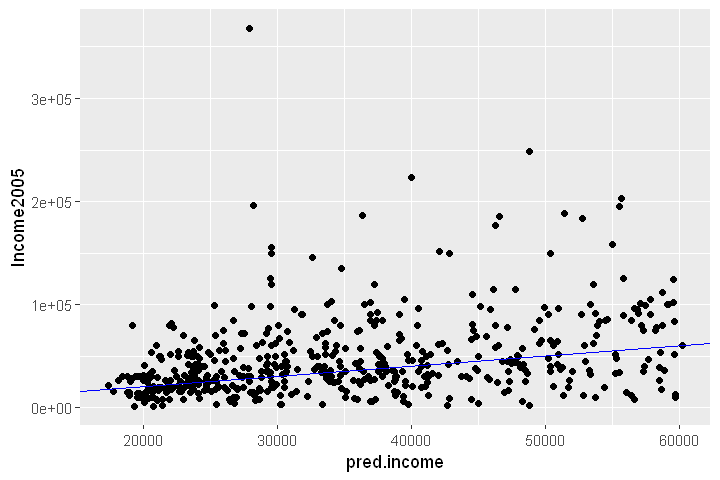

In [58]:
# Examine Income2005 in the training set
summary(incometrain$Income2005)

# Write the formula for log income as a function of the tests and print it
(fmla.log <- log(Income2005) ~ Arith + Word + Parag + Math + AFQT)

# Fit the linear model
model.log <-  lm(fmla.log, data = incometrain)

# Make predictions on income_test
incometest$logpred <- predict(model.log, newdata = incometest)
summary(incometest$logpred)

# Convert the predictions to monetary units
incometest$pred.income <- exp(incometest$logpred)
summary(incometest$pred.income)

#  Plot predicted income (x axis) vs income
ggplot(incometest, aes(x = pred.income, y = Income2005)) + 
  geom_point() + 
  geom_abline(color = "blue")

Remember that when you transform the output before modeling, you have to 'reverse transform' the resulting predictions after applying the model. 

### Comparing RMSE and root-mean-squared Relative Error

In this exercise, you will show that log-transforming a monetary output before modeling improves mean relative error (but increases RMSE) compared to modeling the monetary output directly. You will compare the results of model.log from the previous exercise to a model (model.abs) that directly fits income.

The `income_train` and `income_test` datasets are loaded in your workspace, along with your model, model.log.

Also in the workspace:

* model.abs: a model that directly fits income to the inputs using the formula

    Income2005 ~ Arith + Word + Parag + Math + AFQT


In [60]:
# fmla.abs 
fmla.abs <- Income2005 ~ Arith + Word + Parag + Math + AFQT

# model.abs is in the workspace
model.abs <- lm(fmla.abs, data = incometrain)
summary(model.abs)

# Add predictions to the test set
incometest <- incometest %>%
  mutate(pred.absmodel = predict(model.abs, incometest),        # predictions from model.abs
         pred.logmodel = exp(predict(model.log, incometest)))   # predictions from model.log

# Gather the predictions and calculate residuals and relative error
income_long <- incometest %>% 
  gather(key = modeltype, value = pred, pred.absmodel, pred.logmodel) %>%
  mutate(residual = pred - Income2005,   # residuals
         relerr   = residual / Income2005)   # relative error

# Calculate RMSE and relative RMSE and compare
income_long %>% 
  group_by(modeltype) %>%      # group by modeltype
  summarize(rmse     = sqrt(mean(residual^2)),    # RMSE
            rmse.rel = sqrt(mean(relerr^2)))    # Root mean squared relative error


Call:
lm(formula = fmla.abs, data = incometrain)

Residuals:
   Min     1Q Median     3Q    Max 
-78728 -24137  -6979  11964 648573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17516.7     6420.1   2.728  0.00642 ** 
Arith         1552.3      303.4   5.116 3.41e-07 ***
Word          -132.3      265.0  -0.499  0.61754    
Parag        -1155.1      618.3  -1.868  0.06189 .  
Math           725.5      372.0   1.950  0.05127 .  
AFQT           177.8      144.1   1.234  0.21734    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45500 on 2063 degrees of freedom
Multiple R-squared:  0.1165,	Adjusted R-squared:  0.1144 
F-statistic:  54.4 on 5 and 2063 DF,  p-value: < 2.2e-16


modeltype,rmse,rmse.rel
pred.absmodel,37448.37,3.183705
pred.logmodel,39234.90,2.218663


You've seen how modeling log(income) can reduce the relative error of the fit, at the cost of increased RMSE. Which tradeoff to make depends on the goals of your project. 

### Input transforms: the "hockey stick"

In this exercise, we will build a model to predict price from a measure of the house's size (surface area). The data set houseprice has the columns:

* price : house price in units of $1000
* size: surface area

A scatterplot of the data shows that the data is quite non-linear: a sort of "hockey-stick" where price is fairly flat for smaller houses, but rises steeply as the house gets larger. Quadratics and tritics are often good functional forms to express hockey-stick like relationships. Note that there may not be a "physical" reason that price is related to the square of the size; a quadratic is simply a closed form approximation of the observed relationship.

You will fit a model to predict price as a function of the squared size, and look at its fit on the training data.

Because `^` is also a symbol to express interactions, use the function `I()` to treat the expression `x^2` “as is”: that is, as the square of `x` rather than the interaction of `x` with itself.

    exampleFormula = y ~ I(x^2)

In [61]:
houseprice <- readRDS("houseprice.rds")

      size           price      
 Min.   : 44.0   Min.   : 42.0  
 1st Qu.: 73.5   1st Qu.:164.5  
 Median : 91.0   Median :203.5  
 Mean   : 94.3   Mean   :249.2  
 3rd Qu.:118.5   3rd Qu.:287.8  
 Max.   :150.0   Max.   :573.0  

price ~ I(size^2)

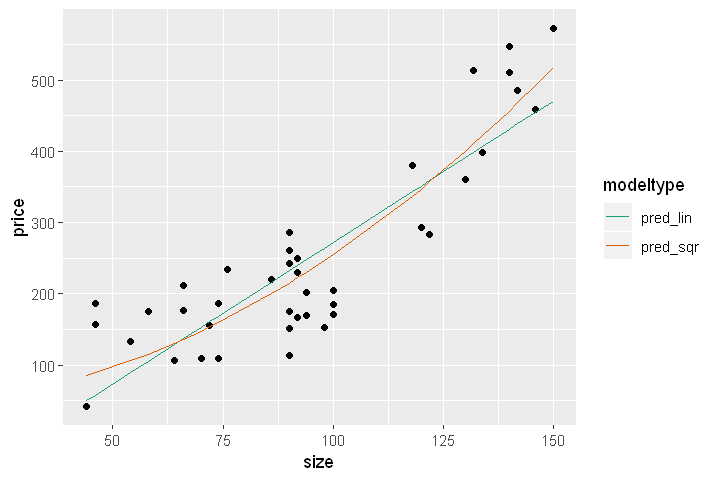

In [62]:
# houseprice is in the workspace
summary(houseprice)

# Create the formula for price as a function of squared size
(fmla_sqr <- price ~ I(size^2))

# Fit a model of price as a function of squared size (use fmla_sqr)
model_sqr <- lm(fmla_sqr, data = houseprice)

# Fit a model of price as a linear function of size
model_lin <- lm(price ~ size, data = houseprice)

# Make predictions and compare
houseprice %>% 
    mutate(pred_lin = predict(model_lin),       # predictions from linear model
           pred_sqr = predict(model_sqr)) %>%   # predictions from quadratic model 
    gather(key = modeltype, value = pred, pred_lin, pred_sqr) %>% # gather the predictions
    ggplot(aes(x = size)) + 
       geom_point(aes(y = price)) +                   # actual prices
       geom_line(aes(y = pred, color = modeltype)) + # the predictions
       scale_color_brewer(palette = "Dark2")

### Input transforms: the "hockey stick" 

In the last exercise you saw that a quadratic model seems to fit the houseprice data better than a linear model. In this exercise you will confirm whether the quadratic model would perform better on out-of-sample data. Since this data set is small, you will use cross-validation. 

For comparison, the sample code will calculate cross-validation predictions from a linear model price ~ size.

In [63]:
# houseprice is in the workspace
summary(houseprice)

# fmla_sqr is in the workspace
fmla_sqr

# Create a splitting plan for 3-fold cross validation
set.seed(34245)  # set the seed for reproducibility
splitPlan <- kWayCrossValidation(nrow(houseprice), 3, NULL, NULL)

# Sample code: get cross-val predictions for price ~ size
houseprice$pred_lin <- 0  # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_lin <- lm(price ~ size, data = houseprice[split$train,])
  houseprice$pred_lin[split$app] <- predict(model_lin, newdata = houseprice[split$app,])
}

# Get cross-val predictions for price as a function of size^2 (use fmla_sqr)
houseprice$pred_sqr <- 0 # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_sqr <- lm(fmla_sqr, data = houseprice[split$train, ])
  houseprice$pred_sqr[split$app] <- predict(model_sqr, newdata = houseprice[split$app, ])
}

# Gather the predictions and calculate the residuals
houseprice_long <- houseprice %>%
  gather(key = modeltype, value = pred, pred_lin, pred_sqr) %>%
  mutate(residuals = pred - price)

# Compare the cross-validated RMSE for the two models
houseprice_long %>% 
  group_by(modeltype) %>% # group by modeltype
  summarize(rmse = sqrt(mean(residuals^2)))

      size           price      
 Min.   : 44.0   Min.   : 42.0  
 1st Qu.: 73.5   1st Qu.:164.5  
 Median : 91.0   Median :203.5  
 Mean   : 94.3   Mean   :249.2  
 3rd Qu.:118.5   3rd Qu.:287.8  
 Max.   :150.0   Max.   :573.0  

price ~ I(size^2)

modeltype,rmse
pred_lin,74.29993
pred_sqr,63.69409


! You've confirmed that the quadratic input tranformation improved the model. In the next chapter you will see how transformations like this can sometimes be learned automatically. 

### Fit a model of sparrow survival probability

In this exercise, you will estimate the probability that a sparrow survives a severe winter storm, based on physical characteristics of the sparrow.The outcome to be predicted is status ("Survived", "Perished"). The variables we will consider are:

* total_length: length of the bird from tip of beak to tip of tail (mm)
* weight: in grams
* humerus : length of humerus ("upper arm bone" that connects the wing to the body) (inches)

Remember that when using `glm()` to create a logistic regression model, you must explicitly specify that `family = binomial`:

    glm(formula, data = data, family = binomial)

You will call `summary()`, `broom::glance()` to see different functions for examining a logistic regression model. One of the diagnostics that you will look at is the analog to $R^2$, called pseudo-$R^2$.

$$ pseudoR^2=1−\frac{deviance}{null.deviance} $$

You can think of deviance as analogous to variance: it is a measure of the variation in categorical data. The pseudo-$R^2$
is analogous to $R^2$ for standard regression: $R^2$ is a measure of the "variance explained" of a regression model. The pseudo-$R^2$ is a measure of the "deviance explained".

In [65]:
sparrow <- readRDS("sparrow.rds")

In [66]:
# sparrow is in the workspace
summary(sparrow)

# Create the survived column
sparrow$survived <- sparrow$status == "Survived"

# Create the formula
(fmla <- survived ~ total_length + weight + humerus)

# Fit the logistic regression model
sparrow_model <- glm(fmla, data = sparrow, family = binomial)

# Call summary
summary(sparrow_model)

# Call glance
(perf <- glance(sparrow_model))

# Calculate pseudo-R-squared
(pseudoR2 <- 1- perf$deviance / perf$null.deviance)

      status       age             total_length      wingspan    
 Perished:36   Length:87          Min.   :153.0   Min.   :236.0  
 Survived:51   Class :character   1st Qu.:158.0   1st Qu.:245.0  
               Mode  :character   Median :160.0   Median :247.0  
                                  Mean   :160.4   Mean   :247.5  
                                  3rd Qu.:162.5   3rd Qu.:251.0  
                                  Max.   :167.0   Max.   :256.0  
     weight       beak_head        humerus           femur       
 Min.   :23.2   Min.   :29.80   Min.   :0.6600   Min.   :0.6500  
 1st Qu.:24.7   1st Qu.:31.40   1st Qu.:0.7250   1st Qu.:0.7000  
 Median :25.8   Median :31.70   Median :0.7400   Median :0.7100  
 Mean   :25.8   Mean   :31.64   Mean   :0.7353   Mean   :0.7134  
 3rd Qu.:26.7   3rd Qu.:32.10   3rd Qu.:0.7500   3rd Qu.:0.7300  
 Max.   :31.0   Max.   :33.00   Max.   :0.7800   Max.   :0.7600  
    legbone          skull           sternum      
 Min.   :1.010   Min.   :

survived ~ total_length + weight + humerus


Call:
glm(formula = fmla, family = binomial, data = sparrow)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1117  -0.6026   0.2871   0.6577   1.7082  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   46.8813    16.9631   2.764 0.005715 ** 
total_length  -0.5435     0.1409  -3.858 0.000115 ***
weight        -0.5689     0.2771  -2.053 0.040060 *  
humerus       75.4610    19.1586   3.939 8.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.008  on 86  degrees of freedom
Residual deviance:  75.094  on 83  degrees of freedom
AIC: 83.094

Number of Fisher Scoring iterations: 5


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
118.0084,86,-37.54718,83.09436,92.95799,75.09436,83


[1] 0.3636526

When looking at the pseudo-R2 of a logistic regression model, you should hope to see a value close to 1. 

### Predict sparrow survival

In this exercise you will predict the probability of survival using the sparrow survival model from the previous exercise.

Recall that when calling `predict()` to get the predicted probabilities from a `glm()` model, you must specify that you want the response:

    predict(model, type = "response")

Otherwise, `predict()` on a logistic regression model returns the predicted log-odds of the event, not the probability.

You will also use the `GainCurvePlot()` function to plot the gain curve from the model predictions. If the model's gain curve is close to the ideal ("wizard") gain curve, then the model sorted the sparrows well: that is, the model predicted that sparrows that actually survived would have a higher probability of survival. The inputs to the `GainCurvePlot()` function are:

* frame: data frame with prediction column and ground truth column
* xvar: the name of the column of predictions (as a string)
* truthVar: the name of the column with actual outcome (as a string)
* title: a title for the plot (as a string)

    GainCurvePlot(frame, xvar, truthVar, title)

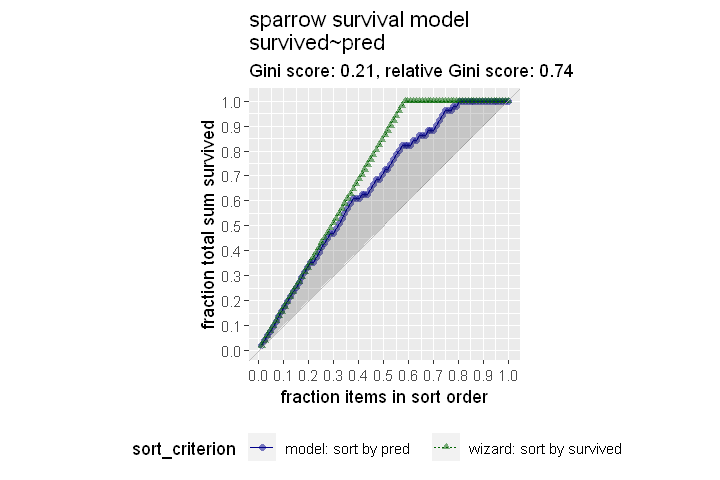

In [67]:
# Make predictions
sparrow$pred <- predict(sparrow_model, type = "response")

# Look at gain curve
GainCurvePlot(sparrow, "pred", "survived", "sparrow survival model")

You see from the gain curve that the model follows the wizard curve for about the first 30% of the data, identifying about 45% of the surviving sparrows with only a few false positives. 

### Poisson or quasipoisson

One of the assumptions of Poisson regression to predict counts is that the event you are counting is Poisson distributed: the average count per unit time is the same as the variance of the count. In practice, "the same" means that the mean and the variance should be of a similar order of magnitude.

When the variance is much larger than the mean, the Poisson assumption doesn't apply, and one solution is to use quasipoisson regression, which does not assume that variance=mean.

For each of the following situations, decide if poisson regression would be suitable, or if you should use quasipoisson regression.

For which situations can you use poisson regression?

1. Number of days students are absent: mean 5.9, variance 49
2. Number of awards a student wins: mean 0.6, variance 1.1
3. Number of hits per website page: mean 108.2, variance 108.5
4. Number of bikes rented per day: mean 273, variance 45863.84


2. an 3. -> When the mean and variance of event arrivals are reasonably close, poisson regression is suitable.

### Fit a model to predict bike rental counts

In this exercise you will build a model to predict the number of bikes rented in an hour as a function of the weather, the type of day (holiday, working day, or weekend), and the time of day. You will train the model on data from the month of July.

The data frame has the columns:

* `cnt`: the number of bikes rented in that hour (the outcome)
* `hr`: the hour of the day (0-23, as a factor)
* `holiday`: TRUE/FALSE
* `workingday`: TRUE if neither a holiday nor a weekend, else FALSE
* `weathersit`: categorical, "Clear to partly cloudy"/"Light Precipitation"/"Misty"
* `temp`: normalized temperature in Celsius
* `atemp`: normalized "feeling" temperature in Celsius
* `hum`: normalized humidity
* `windspeed`: normalized windspeed
* `instant`: the time index -- number of hours since beginning of data set (not a variable)
* `mnth` and `yr`: month and year indices (not variables)

Remember that you must specify `family = poisson` or `family = quasipoisson` when using `glm()` to fit a count model.

Since there are a lot of input variables, for convenience we will specify the outcome and the inputs in variables, and use `paste()` to assemble a string representing the model formula.

In [69]:
load("Bikes.RData") 

In [73]:
outcome <- c("cnt")
vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed")
outcome
vars
#bikesJuly

[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

In [95]:
# bikesJuly is in the workspace
str(bikesJuly)

# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

# Calculate the mean and variance of the outcome
(mean_bikes <- mean(bikesJuly$cnt))
(var_bikes <- var(bikesJuly$cnt))

# Fit the model
bike_model <- glm(fmla, family = quasipoisson, data = bikesJuly)

# Call glance
(perf <- glance(bike_model))

# Calculate pseudo-R-squared
(pseudoR2 <- 1 - perf$deviance / perf$null.deviance)

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp     : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum       : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ cnt       : int  149 93 90 33 4 10 27 50 142 219 ...
 $ instant   : int  13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 ...
 $ mnth      : int  7 7 7 7 7 7 7 7 7 7 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...


[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

[1] 273.6653

[1] 45863.84

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
133364.9,743,NA,NA,NA,28774.9,712


[1] 0.7842393

You've fit a (quasi)poisson model to predict counts! As with a logistic model, you hope for a pseudo-R2 near 1. 

### Predict bike rentals on new data

In this exercise you will use the model you built in the previous exercise to make predictions for the month of August. The data set bikesAugust has the same columns as bikesJuly.

Recall that you must specify `type = "response"` with `predict()` when predicting counts from a glm poisson or quasipoisson model.

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  84.6 40 39.2 27.8 39.2 ...



Call:
glm(formula = fmla, family = quasipoisson, data = bikesJuly)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-21.6117   -4.3121   -0.7223    3.5507   16.5079  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.934986   0.439027  13.519  < 2e-16 ***
hr1                           -0.580055   0.193354  -3.000 0.002794 ** 
hr2                           -0.892314   0.215452  -4.142 3.86e-05 ***
hr3                           -1.662342   0.290658  -5.719 1.58e-08 ***
hr4                           -2.350204   0.393560  -5.972 3.71e-09 ***
hr5                           -1.084289   0.230130  -4.712 2.96e-06 ***
hr6                            0.211945   0.156476   1.354 0.176012    
hr7                            1.211135   0.132332   9.152  < 2e-16 ***
hr8                            1.648361   0.127177  12.961  < 2e-16 ***
hr9                            1.155669   0.133927   8.629  < 2e-16 ***
h

rmse
112.5815


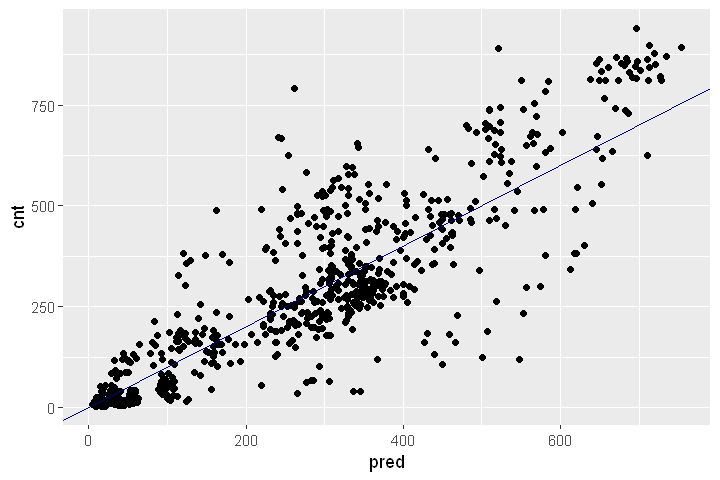

In [96]:
# bikesAugust is in the workspace
str(bikesAugust)

# bike_model is in the workspace
summary(bike_model)

# Make predictions on August data
bikesAugust$pred  <- predict(bike_model, type = "response", newdata = bikesAugust)

# Calculate the RMSE
bikesAugust %>% 
  mutate(residual = pred - cnt) %>%
  summarize(rmse  = sqrt(mean(residual^2)))

# Plot predictions vs cnt (pred on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) +
  geom_point() + 
  geom_abline(color = "darkblue")

(Quasi)poisson models predict non-negative rates, making them useful for count or frequency data. 

### Visualize the Bike Rental Predictions

In the previous exercise, you visualized the bike model's predictions using the standard "outcome vs. prediction" scatter plot. Since the bike rental data is time series data, you might be interested in how the model performs as a function of time. In this exercise, you will compare the predictions and actual rentals on an hourly basis, for the first 14 days of August.

To create the plot you will use the function `tidyr::gather()` to consolidate the predicted and actual values from bikesAugust in a single `column. gather()` takes as arguments:

* The "wide" data frame to be gathered (implicit in a pipe)
* The name of the key column to be created - contains the names of the gathered columns.
* The name of the value column to be created - contains the values of the gathered columns.
* The names of the columns to be gathered into a single column.

You'll use the gathered data frame to compare the actual and predicted rental counts as a function of time. The time index, instant counts the number of observations since the beginning of data collection. The sample code converts the instants to daily units, starting from 0.

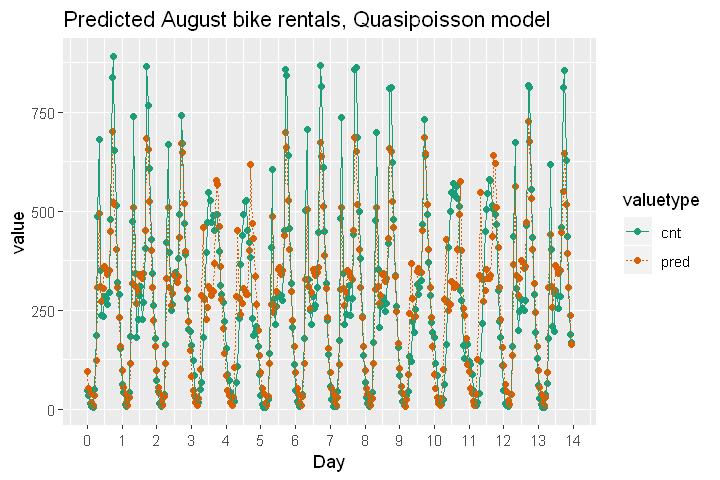

In [97]:
# Plot predictions and cnt by date/time
quasipoisson_plot <-bikesAugust %>% 
  # set start to 0, convert unit to days
  mutate(instant = (instant - min(instant))/24) %>%  
  # gather cnt and pred into a value column
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # restric to first 14 days
  # plot value by instant
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Quasipoisson model")

quasipoisson_plot

This model mostly identifies the slow and busy hours of the day, although it often underestimates peak demand. 

### Writing formulas for GAM models

When using `gam()` to model outcome as an additive function of the inputs, you can use the `s()` function inside formulas to designate that you want use a spline to model the non-linear relationship of a continuous variable to the outcome.

Suppose that you want to predict how much weight (Wtloss) a dieter will lose over a 2-year diet plan as a function of:

* Diet type (categorical)
* Sex (categorical)
* Age at beginning of diet (continuous)
* BMI (body mass index) at beginning of diet (continuous)

You do not want to assume that any of the relationships are linear.

Which is the most appropriate formula?
* Wtloss ~ Diet + Sex + s(Age) + s(BMI)


Suppose that in the diet problem from the previous exercise, you now also want to take into account

* the dieter's resting metabolic rate (BMR -- continuous) and
* the dieter's average number hours of aerobic exercise per day (E -- continuous) at the beginning of the study.

You have reason to believe that the relationship between BMR and weight loss is linear (and you want to model it that way), but not necessarily the relationship between aerobic exercise and weight loss.

Which is the most appropriate formula?
* Wtloss ~ Diet + Sex + s(Age) + s(BMI) + BMR + s(E)

### Model soybean growth with GAM

In this exercise you will model the average leaf weight on a soybean plant as a function of time (after planting). As you will see, the soybean plant doesn't grow at a steady rate, but rather has a "growth spurt" that eventually tapers off. Hence, leaf weight is not well described by a linear model.

Recall that you can designate which variable you want to model non-linearly in a formula with the `s()` function:

    y ~ s(x)

Also remember that `gam()` from the package mgcv has the calling interface

    gam(formula, family, data)

For standard regression, use `family = gaussian` (the default).

The soybean training data, soybean_train is loaded into your workspace. It has two columns: the outcome weight and the variable Time. For comparison, the linear model model.lin, which was fit using the formula weight ~ Time has already been loaded into the workspace as well.

In [98]:
load("Soybean.RData")

In [99]:
library(mgcv)

      Plot     Variety   Year          Time           weight       
 1988F6 : 10   F:161   1988:124   Min.   :14.00   Min.   : 0.0290  
 1988F7 :  9   P:169   1989:102   1st Qu.:27.00   1st Qu.: 0.6663  
 1988P1 :  9           1990:104   Median :42.00   Median : 3.5233  
 1988P8 :  9                      Mean   :43.56   Mean   : 6.1645  
 1988P2 :  9                      3rd Qu.:56.00   3rd Qu.:10.3808  
 1988F3 :  8                      Max.   :84.00   Max.   :27.3700  
 (Other):276                                                       

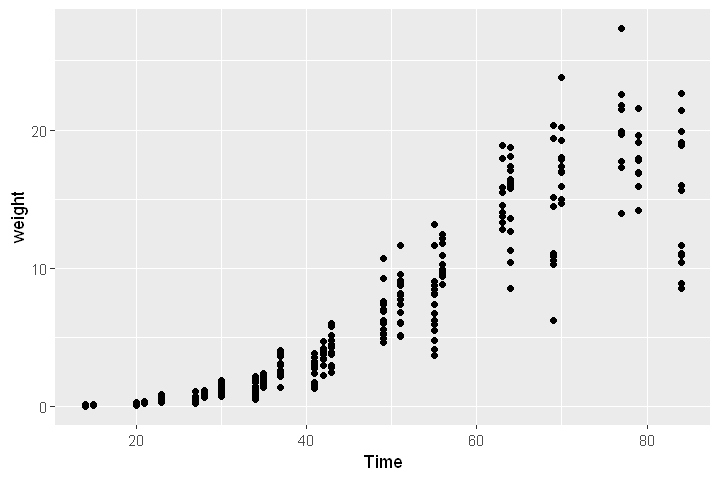

In [100]:
# soybean_train is in the workspace
summary(soybean_train)

# Plot weight vs Time (Time on x axis)
ggplot(soybean_train, aes(x = Time, y = weight)) + 
  geom_point()

weight ~ Time

weight ~ s(Time)


Call:
lm(formula = fmla.lin, data = soybean_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3933 -1.7100 -0.3909  1.9056 11.4381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.559283   0.358527  -18.30   <2e-16 ***
Time         0.292094   0.007444   39.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.778 on 328 degrees of freedom
Multiple R-squared:  0.8244,	Adjusted R-squared:  0.8238 
F-statistic:  1540 on 1 and 328 DF,  p-value: < 2.2e-16



Family: gaussian 
Link function: identity 

Formula:
weight ~ s(Time)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1645     0.1143   53.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df     F p-value    
s(Time) 8.495   8.93 338.2  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.902   Deviance explained = 90.4%
GCV = 4.4395  Scale est. = 4.3117    n = 330

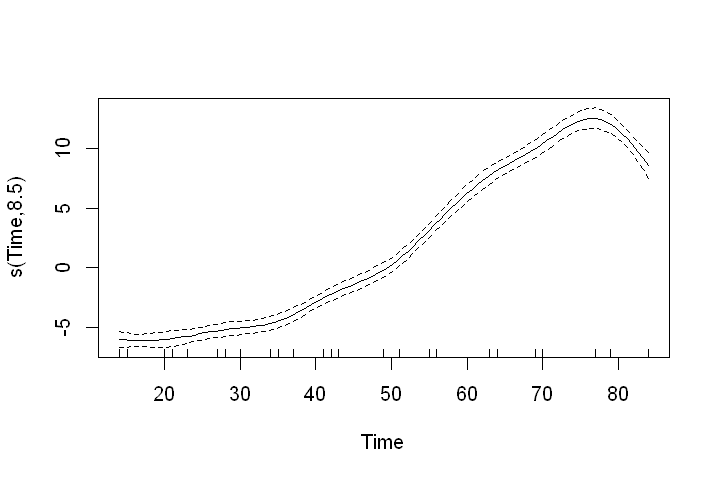

In [101]:
# Create the formula for fmla.lin
(fmla.lin <- weight ~ Time)

# Fit a linear model
model.lin <- lm(fmla.lin, data = soybean_train)

# Create the formula 
(fmla.gam <- weight ~ s(Time))

# Fit the GAM Model
model.gam <- gam(fmla.gam, data = soybean_train)

# Call summary() on model.lin and look for R-squared
summary(model.lin)

# Call summary() on model.gam and look for R-squared
summary(model.gam)

# Call plot() on model.gam
plot(model.gam)

For this data, the GAM appears to fit the data better than a linear model, as measured by the R-squared. 
### Predict with the soybean model on test data

      Plot    Variety   Year         Time           weight       
 1988F8 : 4   F:43    1988:32   Min.   :14.00   Min.   : 0.0380  
 1988P7 : 4   P:39    1989:26   1st Qu.:23.00   1st Qu.: 0.4248  
 1989F8 : 4           1990:24   Median :41.00   Median : 3.0025  
 1990F8 : 4                     Mean   :44.09   Mean   : 7.1576  
 1988F4 : 3                     3rd Qu.:69.00   3rd Qu.:15.0113  
 1988F2 : 3                     Max.   :84.00   Max.   :30.2717  
 (Other):60                                                      

modeltype,rmse
pred.gam,2.286451
pred.lin,3.190995


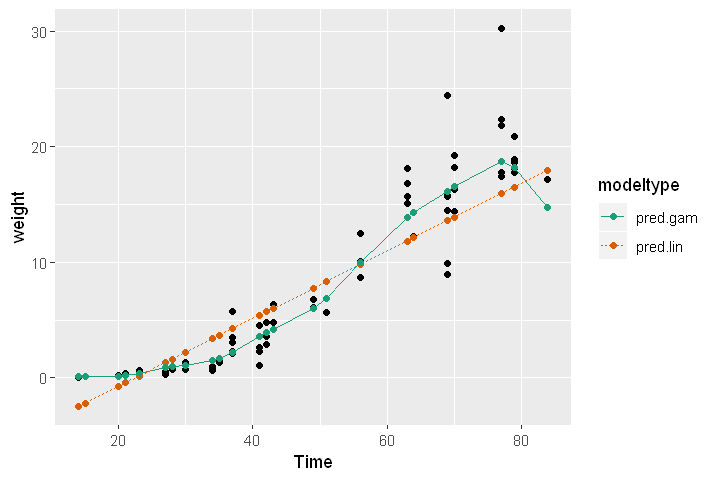

In [102]:
# soybean_test is in the workspace
summary(soybean_test)

# Get predictions from linear model
soybean_test$pred.lin <- predict(model.lin, newdata = soybean_test)

# Get predictions from gam model
soybean_test$pred.gam <- as.numeric(predict(model.gam, newdata = soybean_test))

# Gather the predictions into a "long" dataset
soybean_long <- soybean_test %>%
  gather(key = modeltype, value = pred, pred.lin, pred.gam)

# Calculate the rmse
soybean_long %>%
  mutate(residual = weight - pred) %>%     # residuals
  group_by(modeltype) %>%                  # group by modeltype
  summarize(rmse = sqrt(mean(residual^2))) # calculate the RMSE

# Compare the predictions against actual weights on the test data
soybean_long %>%
  ggplot(aes(x = Time)) +                          # the column for the x axis
  geom_point(aes(y = weight)) +                    # the y-column for the scatterplot
  geom_point(aes(y = pred, color = modeltype)) +   # the y-column for the point-and-line plot
  geom_line(aes(y = pred, color = modeltype, linetype = modeltype)) + # the y-column for the point-and-line plot
  scale_color_brewer(palette = "Dark2")
  

The GAM learns the non-linear growth function of the soybean plants, including the fact that weight is never negative. 

### Build a random forest model for bike rentals

In this exercise you will again build a model to predict the number of bikes rented in an hour as a function of the weather, the type of day (holiday, working day, or weekend), and the time of day. You will train the model on data from the month of July.

You will use the ranger package to fit the random forest model. For this exercise, the key arguments to the `ranger()` call are:

* `formula`
* `data`
* `num.trees`: the number of trees in the forest.
* `respect.unordered.factors` : Specifies how to treat unordered factor variables. We recommend setting this to "order" for regression.
* `seed`: because this is a random algorithm, you will set the seed to get reproducible results

Since there are a lot of input variables, for convenience we will specify the outcome and the inputs in the variables outcome and vars, and use `paste()` to assemble a string representing the model formula.

In [103]:
# bikesJuly is in the workspace
str(bikesJuly)

# Random seed to reproduce results
seed <- set.seed(423563)

# The outcome column
(outcome <- "cnt")

# The input variables
(vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"))

# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

# Load the package ranger
library(ranger)

# Fit and print the random forest model
(bike_model_rf <- ranger(fmla, # formula 
                         bikesJuly, # data
                         num.trees = 500, 
                         respect.unordered.factors = "order", 
                         seed = seed))

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp     : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum       : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ cnt       : int  149 93 90 33 4 10 27 50 142 219 ...
 $ instant   : int  13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 ...
 $ mnth      : int  7 7 7 7 7 7 7 7 7 7 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...


[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8573.135 
R squared (OOB):                  0.8130742 

You have fit a model to the data with a respectable R-squared. In the next exercise you will see how well it does on holdout data. 

### Predict bike rentals with the random forest model

In this exercise you will use the model that you fit in the previous exercise to predict bike rentals for the month of August.

The `predict()` function for a ranger model produces a list. One of the elements of this list is predictions, a vector of predicted values. You can access predictions with the `$` notation for accessing named elements of a list:

       predict(model, data)$predictions

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  47.595 35.276 0.552 -6.725 3.847 ...


Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8573.135 
R squared (OOB):                  0.8130742 

rmse
97.34674


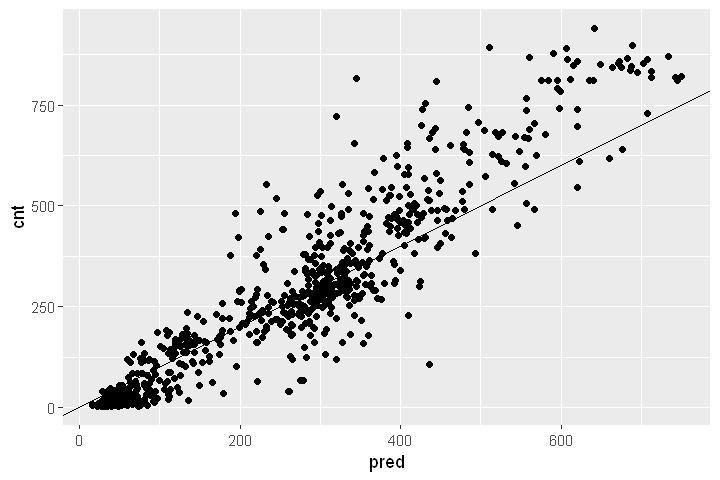

In [137]:
# bikesAugust is in the workspace
str(bikesAugust)

# bike_model_rf is in the workspace
bike_model_rf

# Make predictions on the August data
bikesAugust$pred <- predict(bike_model_rf, bikesAugust)$predictions

# Calculate the RMSE of the predictions
bikesAugust %>% 
  mutate(residual = cnt - pred)  %>% # calculate the residual
  summarize(rmse  = sqrt(mean(residual^2)))      # calculate rmse

# Plot actual outcome vs predictions (predictions on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

 This random forest model outperforms the poisson count model on the same data; it is discovering more complex non-linear or non-additive relationships in the data. 

### Visualize random forest bike model predictions

In the previous exercise, you saw that the random forest bike model did better on the August data than the quasiposson model, in terms of RMSE.

In this exercise you will visualize the random forest model's August predictions as a function of time. The corresponding plot from the quasipoisson model that you built in a previous exercise is in the workspace for you to compare.

Recall that the quasipoisson model mostly identified the pattern of slow and busy hours in the day, but it somewhat underestimated peak demands. You would like to see how the random forest model compares.

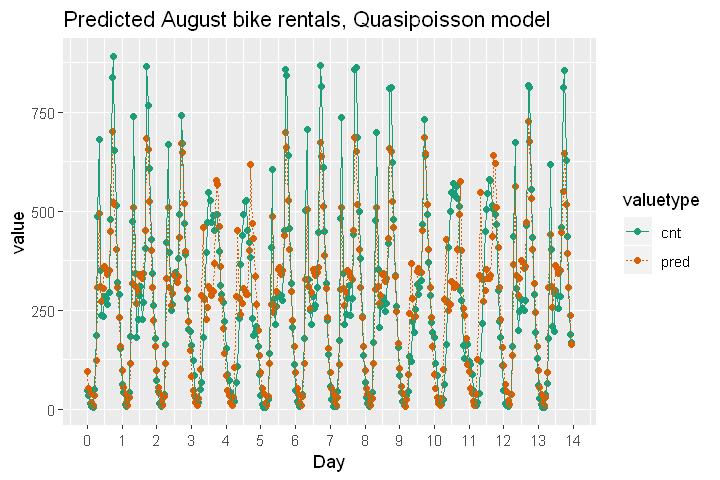

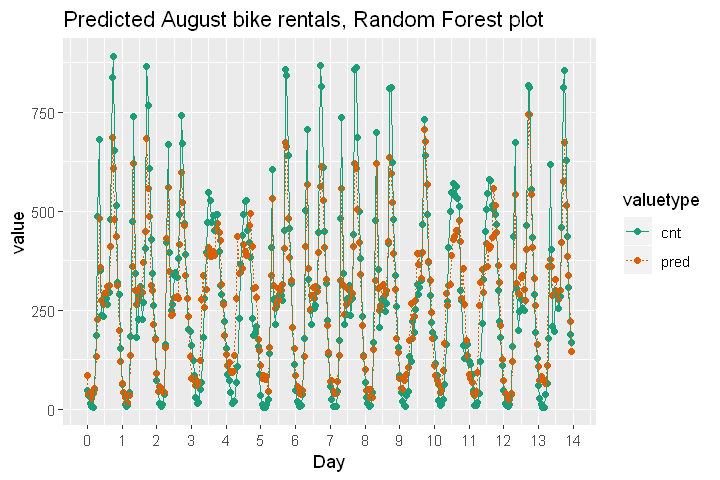

In [138]:
# Print quasipoisson_plot
quasipoisson_plot

# Plot predictions and cnt by date/time
randomforest_plot <- bikesAugust %>% 
  mutate(instant = (instant - min(instant))/24) %>%  # set start to 0, convert unit to days
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # first two weeks
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Random Forest plot")
randomforest_plot

The random forest model captured the day-to-day variations in peak demand better than the quasipoisson model, but it still underestmates peak demand, and also overestimates minimum demand. So there is still room for improvement. 

### vtreat on a small example

In this exercise you will use `vtreat` to one-hot-encode a categorical variable on a small example. `vtreat` creates a treatment plan to transform categorical variables into indicator variables (coded `"lev"`), and to clean bad values out of numerical variables (coded `"clean"`).

To design a treatment plan use the function `designTreatmentsZ()`

    treatplan <- designTreatmentsZ(data, varlist)

* `data`: the original training data frame
* `varlist`: a vector of input variables to be treated (as strings).

`designTreatmentsZ()` returns a list with an element `scoreFrame`: a data frame that includes the names and types of the new variables:

    scoreFrame <- treatplan %>% 
            magrittr::use_series(scoreFrame) %>% 
            select(varName, origName, code)

* `varName`: the name of the new treated variable
* `origName`: the name of the original variable that the treated variable     comes from
* `code`: the type of the new variable.
    * `"clean"`: a numerical variable with no NAs or NaNs
    * `"lev"`: an indicator variable for a specific level of the original categorical variable.

(`magrittr::use_series()` is an alias for `$` that you can use in pipes.)

For these exercises, we want `varName` where `code` is either `"clean"` or `"lev"`:

    newvarlist <- scoreFrame %>% 
             filter(code %in% c("clean", "lev") %>%
             magrittr::use_series(varName)

To transform the data set into all numerical and one-hot-encoded variables, use `prepare()`:

    data.treat <- prepare(treatplan, data, varRestrictions = newvarlist)

* `treatplan`: the treatment plan
* `data`: the data frame to be treated
* `varRestrictions`: the variables desired in the treated data


In [109]:
# dframe 
color <- factor(c("b", "r", "r", "r", "r", "b", "r", "g", "b", "b"), 
                levels= c("b", "g", "r"))
size <- c(13, 11, 15, 14, 13, 11, 9, 12, 7, 12)
popularity <- c(1.0785088, 1.3956245, 0.9217988, 1.2025453, 1.0838662,
                0.8043527, 1.1035440, 0.8746332, 0.6947058, 0.8832502)
dframe <- data.frame(color, size, popularity)
str(dframe)

'data.frame':	10 obs. of  3 variables:
 $ color     : Factor w/ 3 levels "b","g","r": 1 3 3 3 3 1 3 2 1 1
 $ size      : num  13 11 15 14 13 11 9 12 7 12
 $ popularity: num  1.079 1.396 0.922 1.203 1.084 ...


In [114]:
# Create and print a vector of variable names
(vars <- c("color", "size"))

# Load the package vtreat
library(vtreat)
library(magrittr)

# Create the treatment plan
treatplan <- designTreatmentsZ(dframe, vars)

# Examine the scoreFrame
(scoreFrame <- treatplan %>%
    use_series(scoreFrame) %>%
    select(varName, origName, code))

# We only want the rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
    filter(code %in% c("clean", "lev")) %>%
    use_series(varName))

# Create the treated training data
(dframe.treat <- prepare(treatplan, dframe, varRestriction = newvars))
dframe

[1] "color" "size"

[1] "vtreat 1.3.2 inspecting inputs Wed Dec 05 22:40:55 2018"
[1] "designing treatments Wed Dec 05 22:40:55 2018"
[1] " have initial level statistics Wed Dec 05 22:40:55 2018"
[1] " scoring treatments Wed Dec 05 22:40:55 2018"
[1] "have treatment plan Wed Dec 05 22:40:55 2018"


varName,origName,code
color_catP,color,catP
size_clean,size,clean
color_lev_x_b,color,lev
color_lev_x_g,color,lev
color_lev_x_r,color,lev


[1] "size_clean"    "color_lev_x_b" "color_lev_x_g" "color_lev_x_r"

size_clean,color_lev_x_b,color_lev_x_g,color_lev_x_r
13,1,0,0
11,0,0,1
15,0,0,1
14,0,0,1
13,0,0,1
11,1,0,0
9,0,0,1
12,0,1,0
7,1,0,0
12,1,0,0


color,size,popularity
b,13,1.0785088
r,11,1.3956245
r,15,0.9217988
r,14,1.2025453
r,13,1.0838662
b,11,0.8043527
r,9,1.1035440
g,12,0.8746332
b,7,0.6947058
b,12,0.8832502


You have successfully one-hot-encoded categorical data. The new indicator variables have '`_lev_`' in their names, and the new cleaned continuous variables have '`_clean`' in their names. The treated data is all numerical, with no missing values, and is suitable for use with xgboost and other R modeling functions. 

### Novel levels

When a level of a categorical variable is rare, sometimes it will fail to show up in training data. If that rare level then appears in future data, downstream models may not know what to do with it. When such novel levels appear, using `model.matrix` or `caret::dummyVars` to one-hot-encode will not work correctly.

`vtreat` is a "safer" alternative to `model.matrix` for one-hot-encoding, because it can manage novel levels safely. `vtreat` also manages missing values in the data (both categorical and continuous).

In this exercise you will see how `vtreat` handles categorical values that did not appear in the training set.

In [116]:
summary(treatplan)

              Length Class           Mode     
treatments    3      -none-          list     
scoreFrame    8      data.frame      list     
outcomename   1      -none-          character
vtreatVersion 1      package_version list     
outcomeType   1      -none-          character
outcomeTarget 1      -none-          character
meanY         1      -none-          logical  
splitmethod   1      -none-          character

In [119]:
color <- factor(c("g", "g", "y", "g", "g", "y", "b", "g", "g", "r"), 
                levels = c("b", "g", "r", "y"))
size <- c(7, 8, 10, 12, 6, 8, 12, 12, 12, 8)
popularity <- c(0.9733920, 0.9122529, 1.4217153, 1.1905828, 0.9866464,
                1.3697515, 1.0959387, 0.9161547, 1.0000460, 1.3137360)

testframe <- data.frame(color, size, popularity)

In [120]:
str(testframe)

'data.frame':	10 obs. of  3 variables:
 $ color     : Factor w/ 4 levels "b","g","r","y": 2 2 4 2 2 4 1 2 2 3
 $ size      : num  7 8 10 12 6 8 12 12 12 8
 $ popularity: num  0.973 0.912 1.422 1.191 0.987 ...


In [121]:
# Print dframe and testframe
dframe
testframe

# Use prepare() to one-hot-encode testframe
(testframe.treat <- prepare(treatplan, testframe, varRestriction = newvars))

color,size,popularity
b,13,1.0785088
r,11,1.3956245
r,15,0.9217988
r,14,1.2025453
r,13,1.0838662
b,11,0.8043527
r,9,1.1035440
g,12,0.8746332
b,7,0.6947058
b,12,0.8832502


color,size,popularity
g,7,0.9733920
g,8,0.9122529
y,10,1.4217153
g,12,1.1905828
g,6,0.9866464
y,8,1.3697515
b,12,1.0959387
g,12,0.9161547
g,12,1.0000460
r,8,1.3137360


size_clean,color_lev_x_b,color_lev_x_g,color_lev_x_r
7,0,1,0
8,0,1,0
10,0,0,0
12,0,1,0
6,0,1,0
8,0,0,0
12,1,0,0
12,0,1,0
12,0,1,0
8,0,0,1


As you saw, vtreat encodes novel colors like yellow that were not present in the data as all zeros: 'none of the known colors'. This allows downstream models to accept these novel values without crashing. 

### vtreat the bike rental data

In this exercise you will create one-hot-encoded data frames of the July/August bike data, for use with xgboost later on.

The data frames bikesJuly and bikesAugust are in the workspace.

For your convenience, we have defined the variable vars with the list of variable columns for the model.

In [123]:
# The outcome column
(outcome <- "cnt")

# The input columns
(vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"))

# Create the treatment plan from bikesJuly (the training data)
# Set the flag verbose=FALSE to prevent the function from printing too many messages.
treatplan <- designTreatmentsZ(bikesJuly, vars, verbose = FALSE)

# Get the "clean" and "lev" variables from the scoreFrame
(newvars <- treatplan %>%
  use_series(scoreFrame) %>%        
  filter(code %in% c("clean", "lev")) %>%  # get the rows you care about
  use_series(varName))           # get the varName column

# Prepare the training data
bikesJuly.treat <- prepare(treatplan, bikesJuly,  varRestriction = newvars)

# Prepare the test data
bikesAugust.treat <- prepare(treatplan, bikesAugust,  varRestriction = newvars)

# Call str() on the treated data
str(bikesJuly.treat)
str(bikesAugust.treat)

[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

[1] "holiday_clean"                          
 [2] "workingday_clean"                       
 [3] "temp_clean"                             
 [4] "atemp_clean"                            
 [5] "hum_clean"                              
 [6] "windspeed_clean"                        
 [7] "hr_lev_x_0"                             
 [8] "hr_lev_x_1"                             
 [9] "hr_lev_x_10"                            
[10] "hr_lev_x_11"                            
[11] "hr_lev_x_12"                            
[12] "hr_lev_x_13"                            
[13] "hr_lev_x_14"                            
[14] "hr_lev_x_15"                            
[15] "hr_lev_x_16"                            
[16] "hr_lev_x_17"                            
[17] "hr_lev_x_18"                            
[18] "hr_lev_x_19"                            
[19] "hr_lev_x_2"                             
[20] "hr_lev_x_20"                            
[21] "hr_lev_x_21"                            
[22] "hr_lev_x_22"                            
[23] "hr_lev_x_23"                            
[24] "hr_lev_x_3"                             
[25] "hr_lev_x_4"                             
[26] "hr_lev_x_5"                             
[27] "hr_lev_x_6"                             
[28] "hr_lev_x_7"                             
[29] "hr_lev_x_8"                             
[30] "hr_lev_x_9"                             
[31] "weathersit_lev_x_Clear_to_partly_cloudy"
[32] "weathersit_lev_x_Light_Precipitation"   
[33] "weathersit_lev_x_Misty"

'data.frame':	744 obs. of  33 variables:
 $ holiday_clean                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday_clean                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ temp_clean                             : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp_clean                            : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum_clean                              : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed_clean                        : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ hr_lev_x_0                             : num  1 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x_1                             : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x_10                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x_11                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x_12                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x_13                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_le

The bike data is now in completely numeric form, ready to use with xgboost. Note that the treated data does not include the outcome column. 

### Find the right number of trees for a gradient boosting machine

In this exercise you will get ready to build a gradient boosting model to predict the number of bikes rented in an hour as a function of the weather and the type and time of day. You will train the model on data from the month of July.

Remember that bikesJuly.treat no longer has the outcome column, so you must get it from the untreated data: bikesJuly$cnt.

You will use the xgboost package to fit the random forest model. The function `xgb.cv()` uses cross-validation to estimate the out-of-sample learning error as each new tree is added to the model. The appropriate number of trees to use in the final model is the number that minimizes the holdout RMSE.

For this exercise, the key arguments to the `xgb.cv()` call are:

* `data`: a numeric matrix.
* `label`: vector of outcomes (also numeric).
* `nrounds`: the maximum number of rounds (trees to build).
* `nfold`: the number of folds for the cross-validation. 5 is a good number.
* `objective`: "reg:linear" for continuous outcomes.
* `eta`: the learning rate.
* `max_depth`: depth of trees.
* `early_stopping_rounds`: after this many rounds without improvement, stop.
* `verbose`: 0 to stay silent.


In [131]:
# The July data is in the workspace
ls()

# Load the package xgboost
library(xgboost)

# Run xgb.cv
cv <- xgb.cv(data = as.matrix(bikesJuly.treat), 
            label = bikesJuly$cnt,
            nrounds = 100,
            nfold = 5,
            objective = "reg:linear",
            eta = 0.3,
            max_depth = 6,
            early_stopping_rounds = 10,
            verbose = 0    # silent
)

# Get the evaluation log 
elog <- cv$evaluation_log

# Determine and print how many trees minimize training and test error
ntrees <- elog %>% 
   summarize(ntrees.train = which.min(train_rmse_mean),   # find the index of min(train_rmse_mean)
             ntrees.test  = which.min(test_rmse_mean)) # find the index of min(test_rmse_mean)
ntrees
ntree <- ntrees %>% select(ntrees.test) %>% pull()
ntree

[1] "alcohol"             "bike_model"          "bike_model_rf"      
 [4] "bikesAugust"         "bikesAugust.treat"   "bikesJuly"          
 [7] "bikesJuly.treat"     "bloodpressure"       "bloodpressure_model"
[10] "case0901"            "color"               "cv"                 
[13] "dframe"              "dframe.treat"        "elog"               
[16] "fe_mean"             "flower_model"        "flowers"            
[19] "fmla"                "fmla.abs"            "fmla.gam"           
[22] "fmla.lin"            "fmla.log"            "fmla_add"           
[25] "fmla_interaction"    "fmla_sqr"            "gp"                 
[28] "houseprice"          "houseprice_long"     "i"                  
[31] "income_long"         "incometest"          "incometrain"        
[34] "k"                   "mean_bikes"          "mmat"               
[37] "model"               "model.abs"           "model.gam"          
[40] "model.lin"           "model.log"           "model_add"          
[43] "model_interaction"   "model_lin"           "model_sqr"          
[46] "mpg"                 "mpg_model"           "mpg_test"           
[49] "mpg_train"           "N"                   "newrates"           
[52] "newvars"             "nRows"               "ntrees"             
[55] "outcome"             "perf"                "popularity"         
[58] "pred"                "pseudoR2"            "quasipoisson_plot"  
[61] "r_squared"           "res"                 "rho"                
[64] "rho2"                "rmse"                "rmse_test"          
[67] "rmse_train"          "rsq"                 "rsq_glance"         
[70] "rsq_test"            "rsq_train"           "rss"                
[73] "scoreFrame"          "sd_unemployment"     "seed"               
[76] "size"                "soybean_long"        "soybean_test"       
[79] "soybean_train"       "sparrow"             "sparrow_model"      
[82] "split"               "splitPlan"           "target"             
[85] "testframe"           "testframe.treat"     "treatplan"          
[88] "tss"                 "unemployment"        "unemployment_model" 
[91] "var_bikes"           "vars"

ntrees.train,ntrees.test
90,80


[1] 80

 In most cases, ntrees.test is less than ntrees.train. The training error keeps decreasing even after the test error starts to increase. It's important to use cross-validation to find the right number of trees (as determined by ntrees.test) and avoid an overfit model. 

### Fit an xgboost bike rental model and predict

In this exercise you will fit a gradient boosting model using `xgboost()` to predict the number of bikes rented in an hour as a function of the weather and the type and time of day. You will train the model on data from the month of July and predict on data for the month of August.

The datasets for July and August are loaded into your workspace. Remember the vtreat-ed data no longer has the outcome column, so you must get it from the original data (the `cnt` column).

For convenience, the number of trees to use, ntrees from the previous exercise.

The arguments to `xgboost()` are similar to those of `xgb.cv()`.

[1] 80

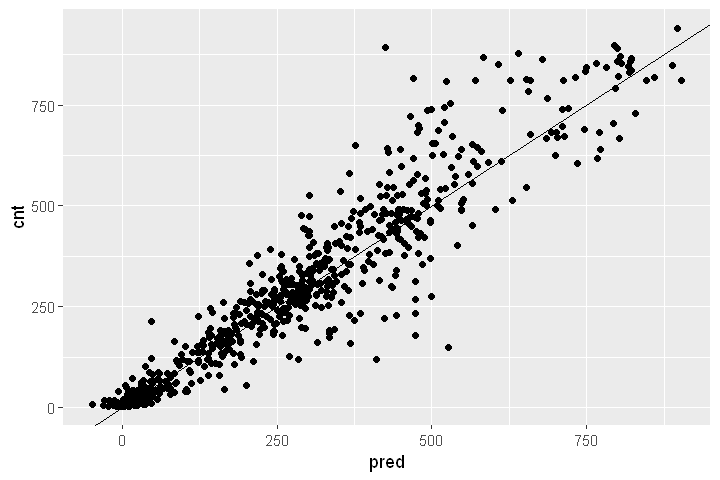

In [139]:
# The number of trees to use, as determined by xgb.cv
ntree

# Run xgboost
bike_model_xgb <- xgboost(data = as.matrix(bikesJuly.treat), # training data as matrix
                   label = bikesJuly$cnt,  # column of outcomes
                   nrounds = ntree,       # number of trees to build
                   objective = "reg:linear", # objective
                   eta = 0.3,
                   depth = 6,
                   verbose = 0  # silent
)

# Make predictions
bikesAugust$pred <- predict(bike_model_xgb, as.matrix(bikesAugust.treat))

# Plot predictions (on x axis) vs actual bike rental count
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

Overall, the scatterplot looked pretty good, but did you notice that the model made some negative predictions? In the next exercise, you'll compare this model's RMSE to the previous bike models that you've built. 

### Evaluate the xgboost bike rental model

In this exercise you will evaluate the gradient boosting model bike_model_xgb that you fit in the last exercise, using data from the month of August. You'll compare this model's RMSE for August to the RMSE of previous models that you've built.

 You have already made predictions using the xgboost model; they are in the column pred.

In [140]:
# bikesAugust is in the workspace
str(bikesAugust)

# Calculate RMSE
bikesAugust %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  47.595 35.276 0.552 -6.725 3.847 ...


rmse
76.61101


Even though this gradient boosting made some negative predictions, overall it makes smaller errors than the previous two models. Perhaps rounding negative predictions up to zero is a reasonable tradeoff. 

### Visualize the xgboost bike rental model

You've now seen three different ways to model the bike rental data. For this example, you've seen that the gradient boosting model had the smallest RMSE. To finish up the course, let's compare the gradient boosting model's predictions to the other two models as a function of time.

On completing this exercise, you will have completed the course. Congratulations! Now you have the tools to apply a variety of approaches to your regression tasks.

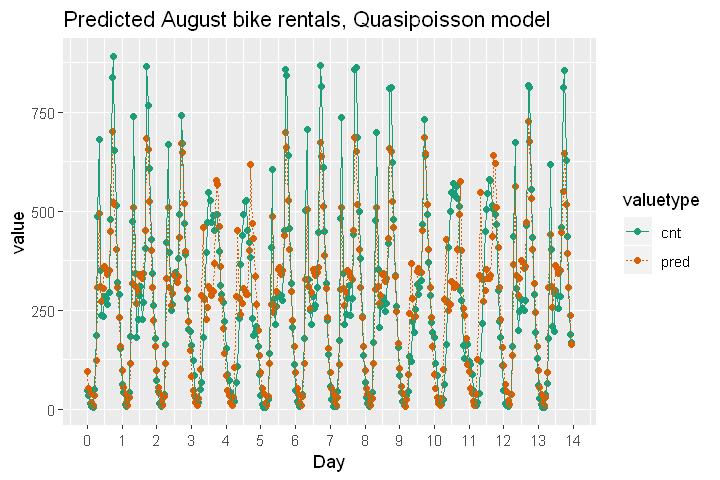

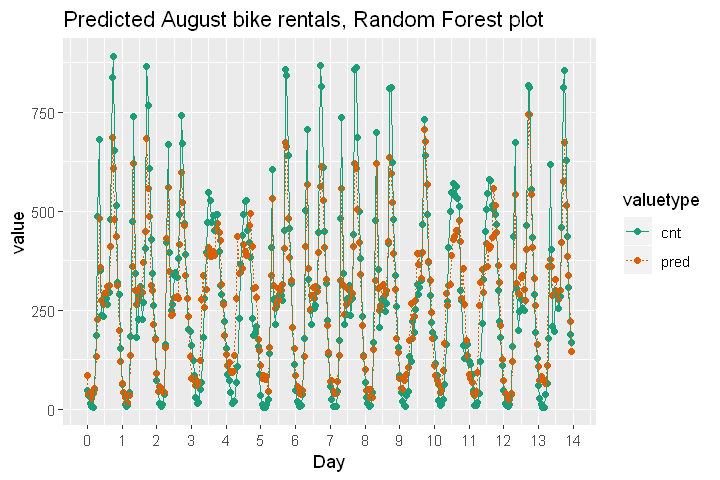

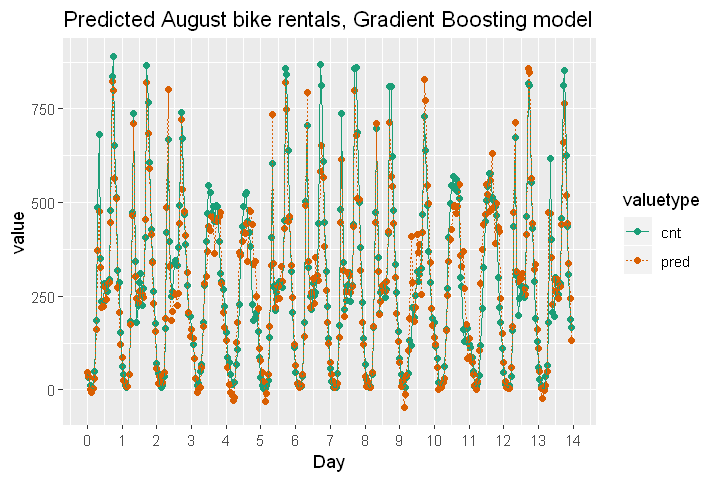

In [141]:
# Print quasipoisson_plot
quasipoisson_plot

# Print randomforest_plot
randomforest_plot

# Plot predictions and actual bike rentals as a function of time (days)
bikesAugust %>% 
  mutate(instant = (instant - min(instant))/24) %>%  # set start to 0, convert unit to days
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # first two weeks
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Gradient Boosting model")

The gradient boosting pattern captures rental variations due to time of day and other factors better than the previous models. Congratulations on completing the course! 